In [1]:
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from math import atan, degrees, radians
import pandas as pd
import numpy as np
import h5py

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

In [2]:
sample_freq = 500   # Hz

metadata = pd.read_csv('../csv/metadata.csv')
metadata = metadata.drop(columns=['Date', 'Patient_ID'])
metadata['Age'].astype(np.int32)
metadata['N'].astype(np.int32)

health_metadata = metadata.loc[metadata['AHA_Code'] == '1']

health_metadata

,ECG_ID,AHA_Code,Age,Sex,N
1,A00002,1,32,M,6000
2,A00003,1,63,M,6500
5,A00006,1,46,F,5000
7,A00008,1,32,M,5000
8,A00009,1,48,F,6000
...,...,...,...,...,...
25754,A25755,1,44,M,5000
25755,A25756,1,76,F,5000
25756,A25757,1,55,F,5000
25763,A25764,1,20,M,5000


In [3]:
health_ECG_ID = health_metadata['ECG_ID'].values

In [4]:
N = 1

signals = []

for i in health_ECG_ID[0:10]:
    with h5py.File(f'../records/record1/{i}.h5', 'r') as f:
        signals.append(f['ecg'][()])

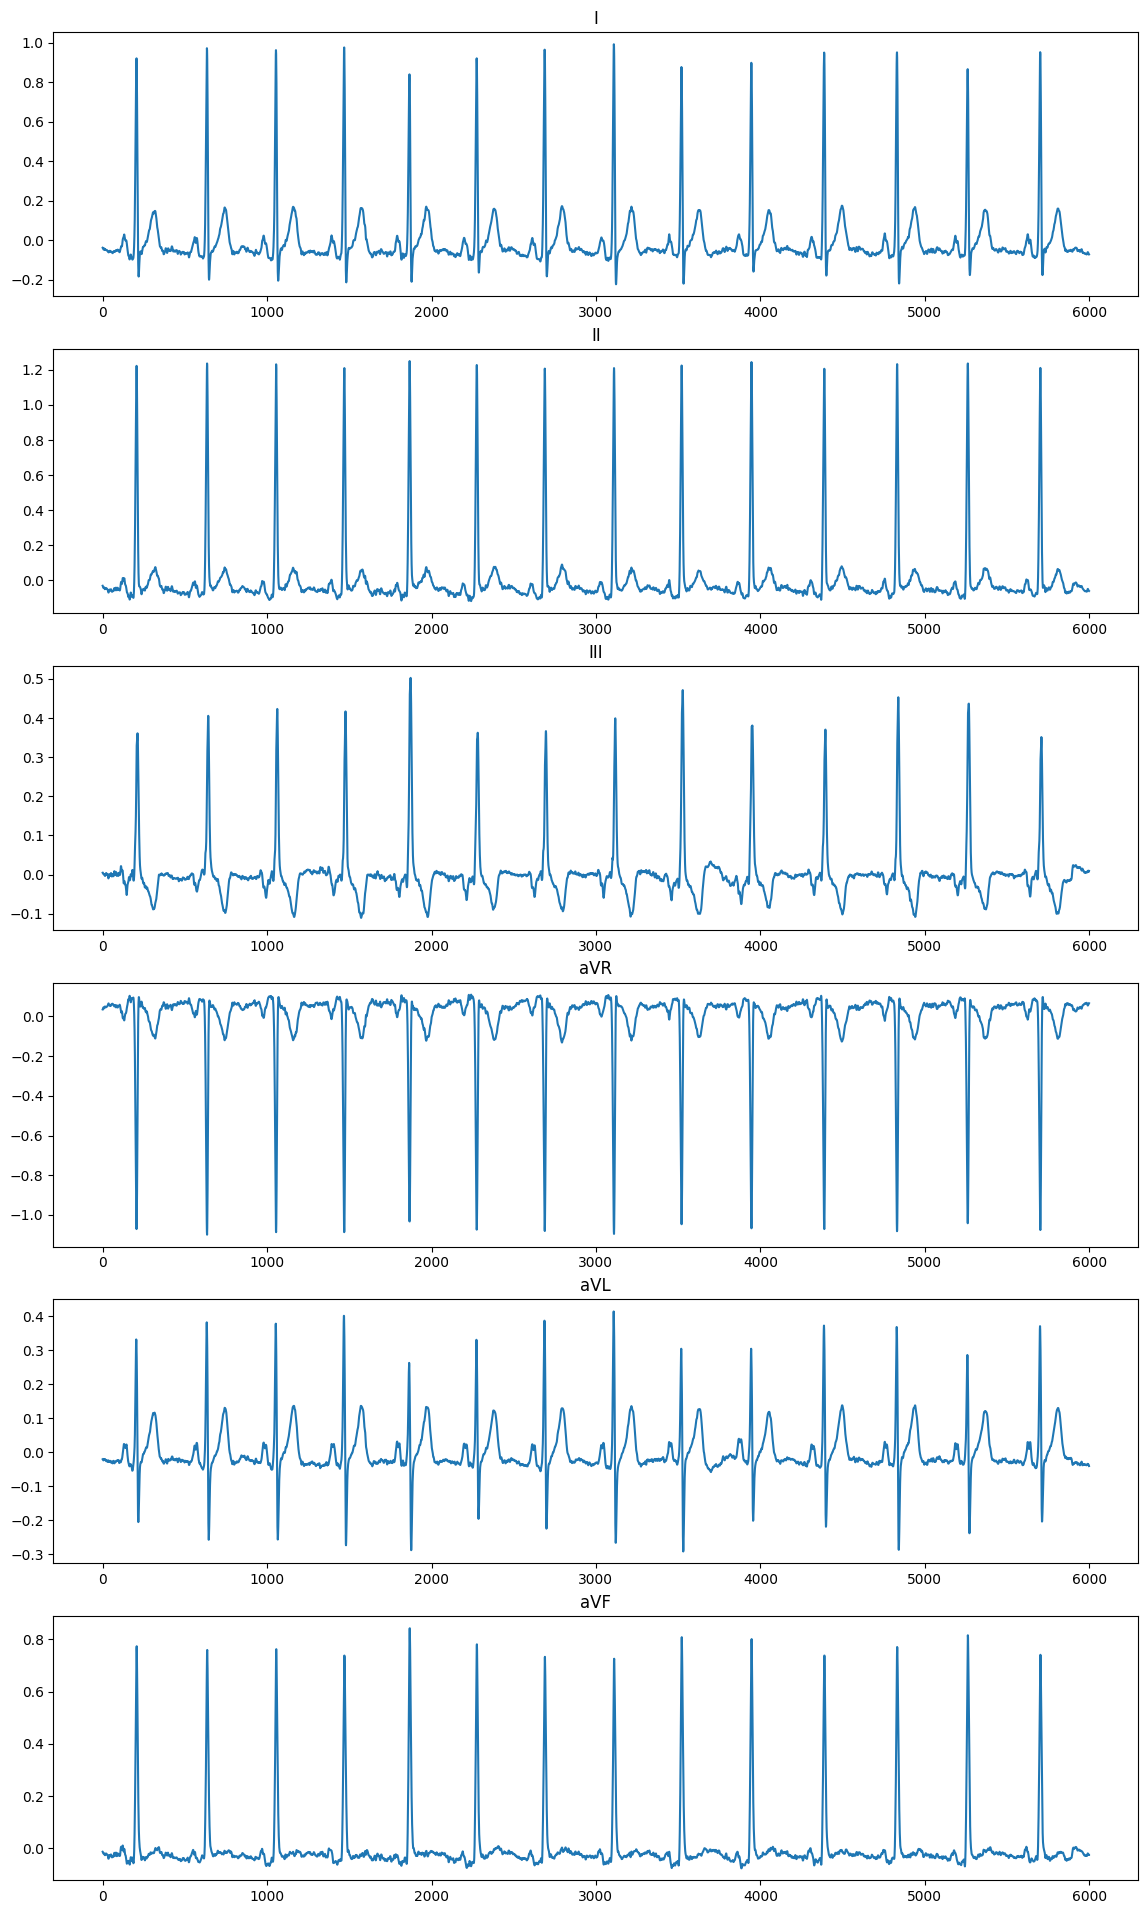

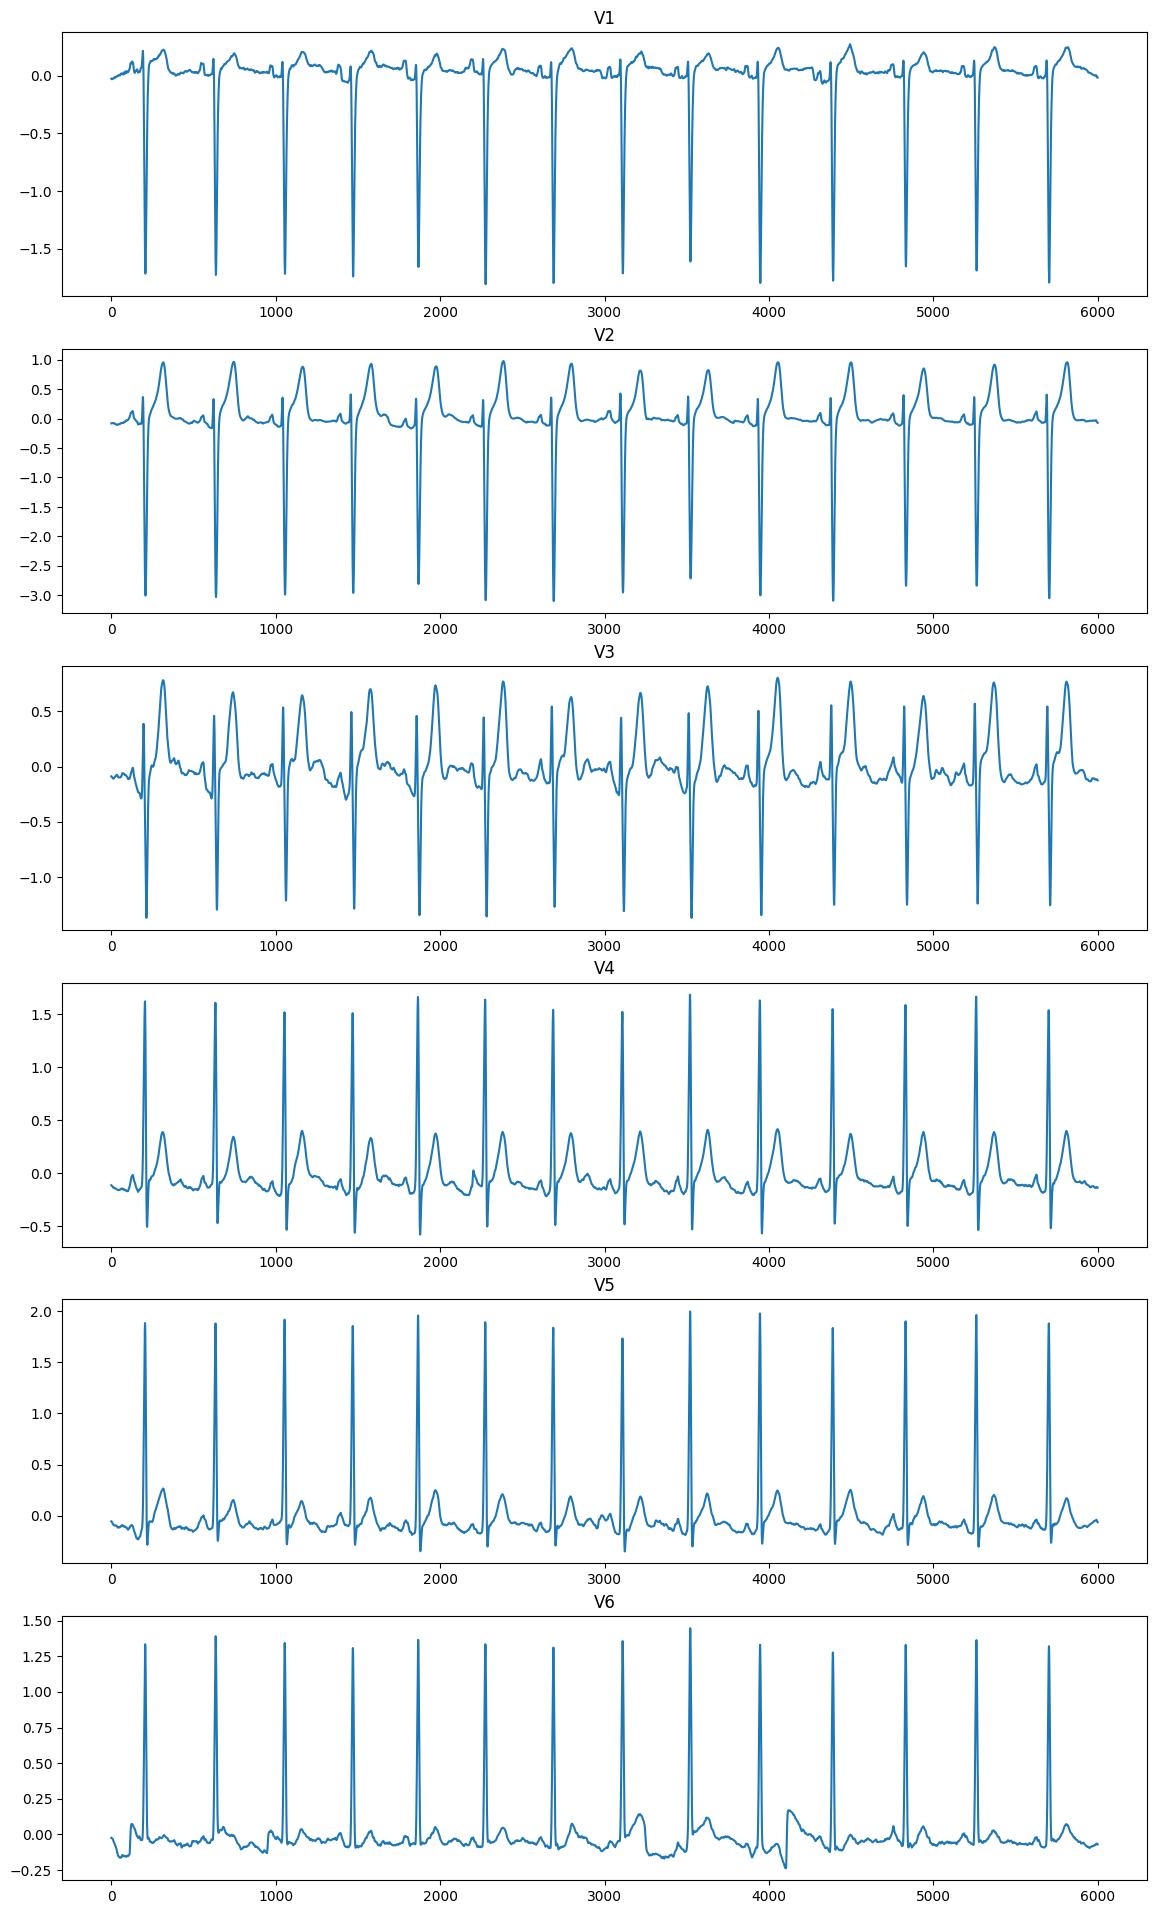

In [5]:
def visualize_12_channels(signal):
    ecg_order = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

    plt.rcParams['figure.figsize'] = [14, 24]
    for i in range(0,6):
        plt.subplot(int(f'61{i + 1}'))
        plt.title(ecg_order[i])
        plt.plot(signal[i])
    plt.show()

    plt.rcParams['figure.figsize'] = [14, 24]
    for i in range(6,12):
        plt.subplot(int(f'61{i - 5}'))
        plt.title(ecg_order[i])
        plt.plot(signal[i])

    plt.show()

visualize_12_channels(signals[0])

In [6]:
def visualize_channel(signal, channel_index):
    ecg_order = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

    plt.rcParams['figure.figsize'] = [14, 4]

    plt.title(ecg_order[channel_index])
    plt.plot(signal[channel_index])
    plt.title((f'Отведение {ecg_order[channel_index]}'))

    plt.show()

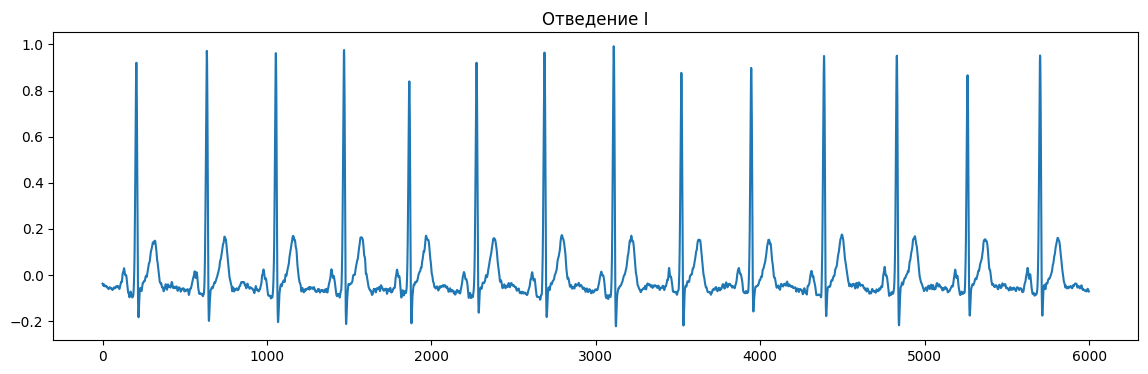

In [7]:
visualize_channel(signals[0], 0)

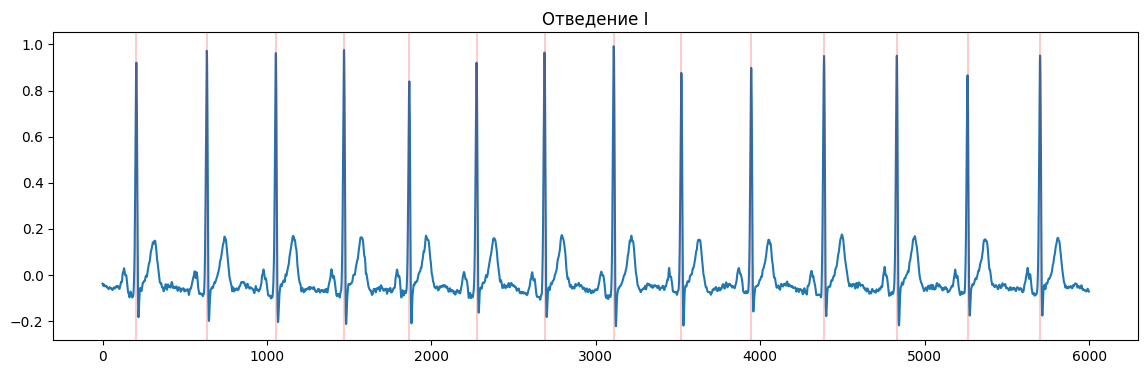

In [8]:
def find_R_peaks(signal, channel=0, sample_freq=500):
    channeled_signal = signal[channel]
    
    streak = 0
    p_peaks = []
    heart_rate = []
    for i in range(1, len(channeled_signal)):
        if atan((abs(channeled_signal[i] - channeled_signal[i-1]))*sample_freq) > radians(85):
            streak = streak + 1
            if channeled_signal[i] - channeled_signal[i-1] < 0:
                if streak > 7:
                    p_peaks.append(i)
                    if len(p_peaks) > 1:
                        heart_rate.append(p_peaks[len(p_peaks) - 1] - p_peaks[len(p_peaks) - 2])

                streak = 0
        else:
            if streak > 7:
                p_peaks.append(i)
                if len(p_peaks) > 1:
                    heart_rate.append(p_peaks[len(p_peaks) - 1] - p_peaks[len(p_peaks) - 2])

            streak = 0

    
    return p_peaks, heart_rate

def visualize_channel_with_peaks(signal, peaks, channel=0):
    ecg_order = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

    plt.rcParams['figure.figsize'] = [14, 4]

    plt.title(ecg_order[channel])
    plt.plot(signal[channel])
    plt.title((f'Отведение {ecg_order[channel]}'))

    for peak in peaks:
        plt.axvline(peak, color='red', alpha=0.2)

    plt.show()

p_peaks_0, heart_rate_0 = find_R_peaks(signals[0])

visualize_channel_with_peaks(signals[0], p_peaks_0)

In [9]:
# 10 пациентов для разметки
health_patients_10 = health_ECG_ID[0:10]

C:\Users\Админ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Админ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


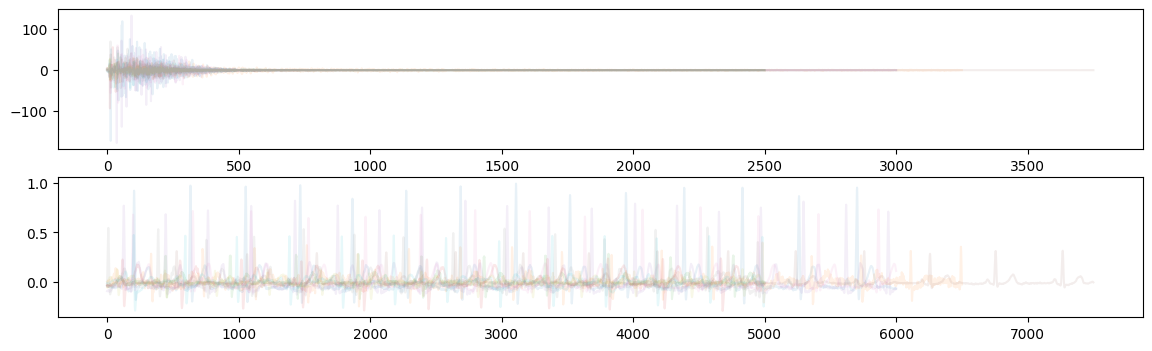

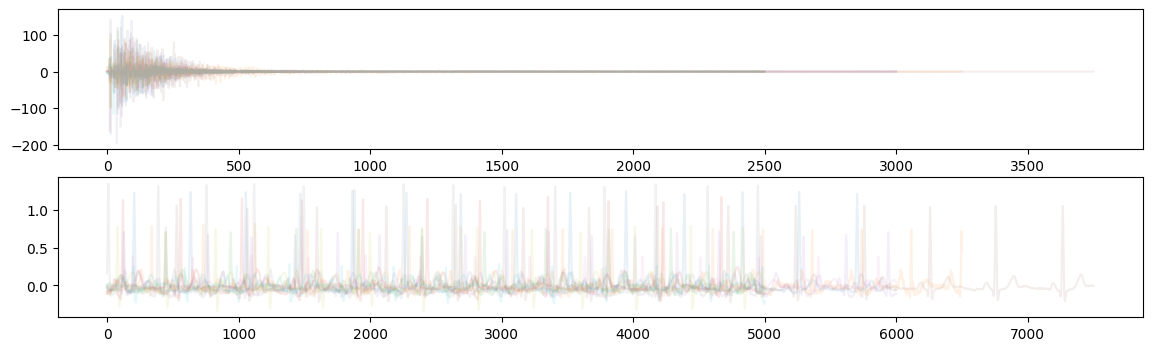

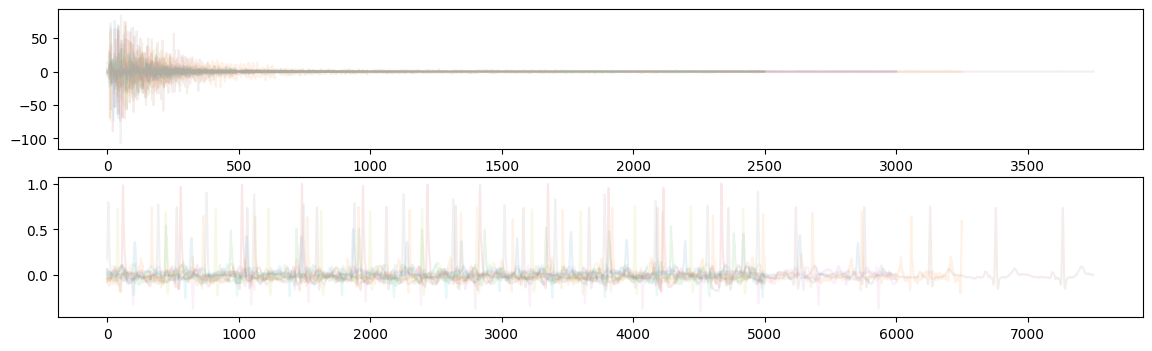

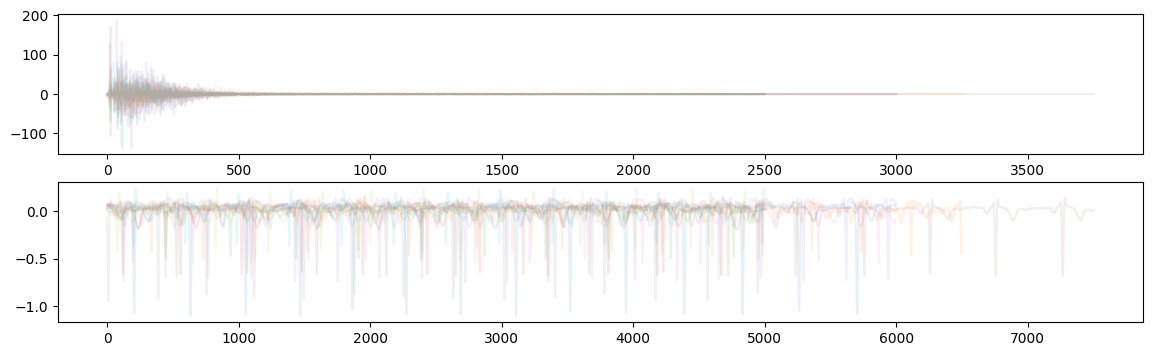

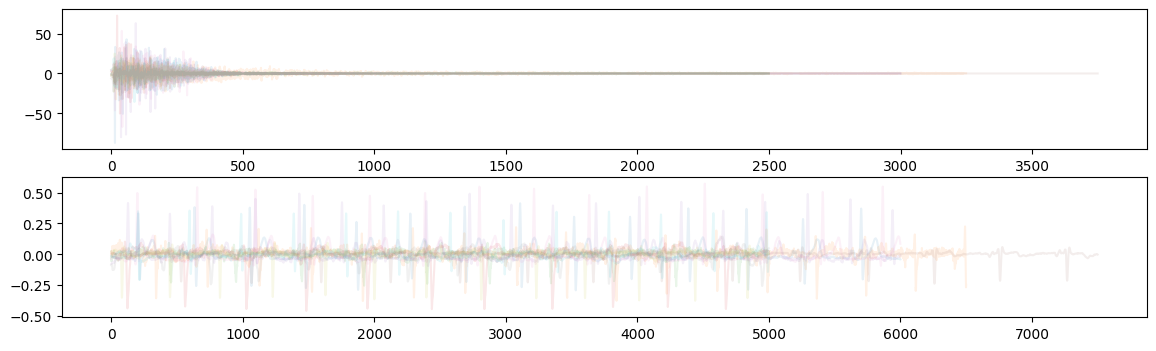

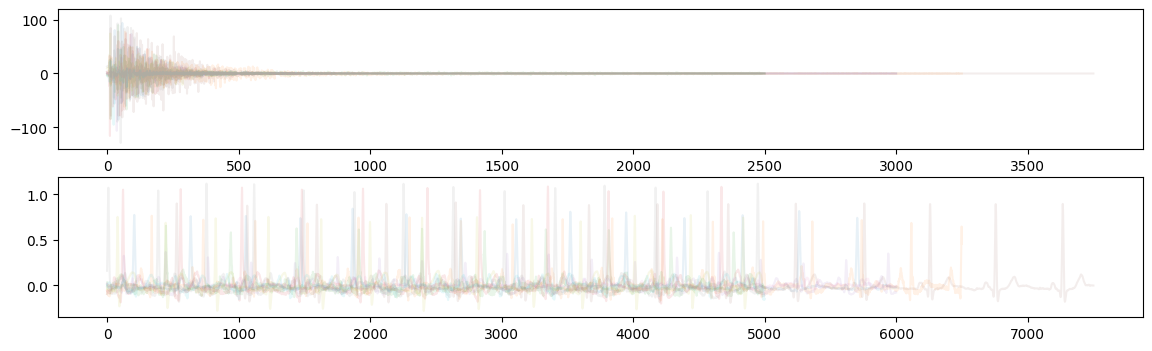

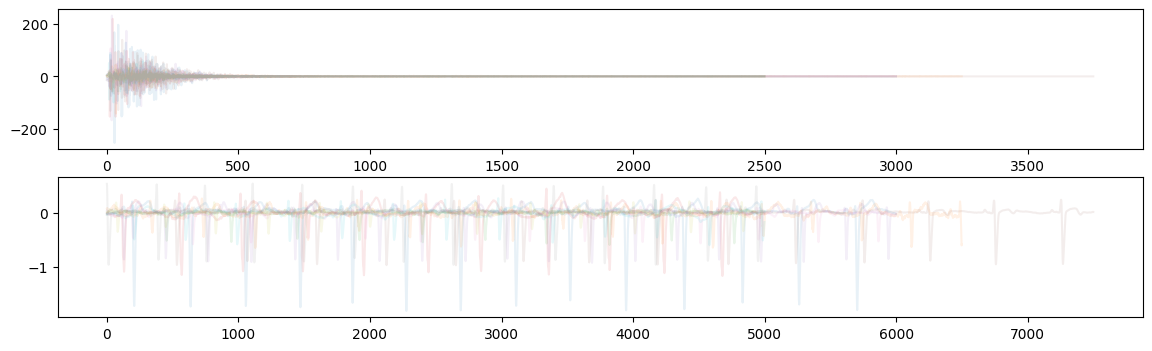

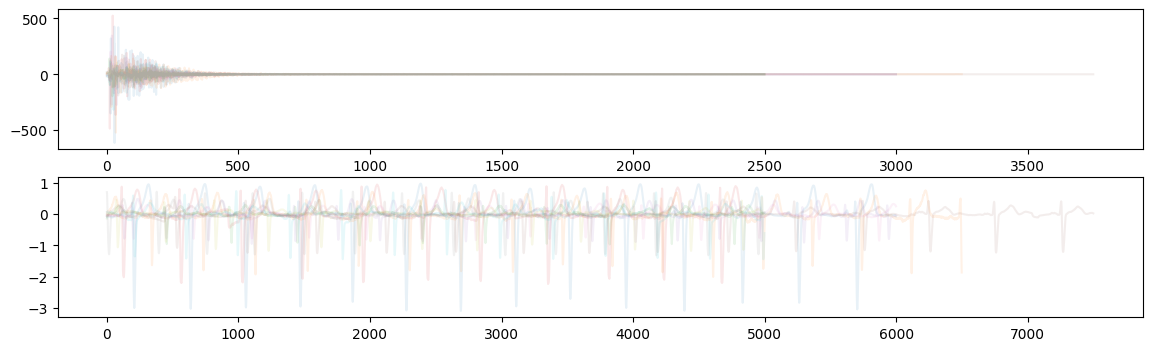

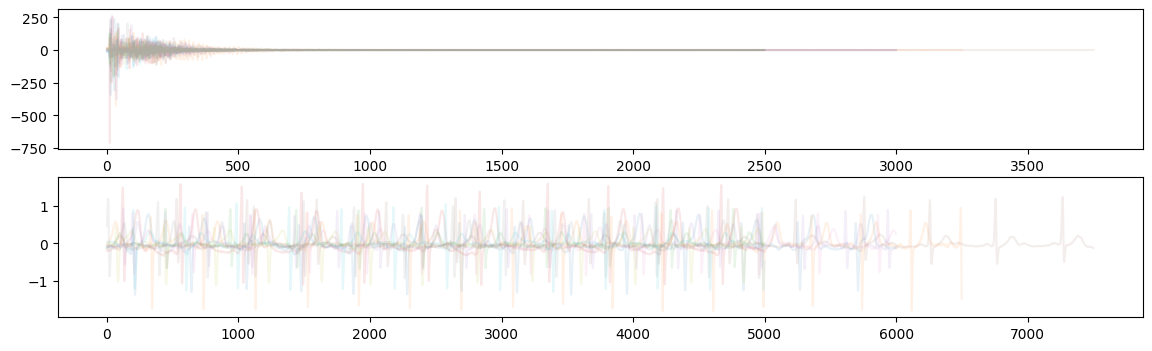

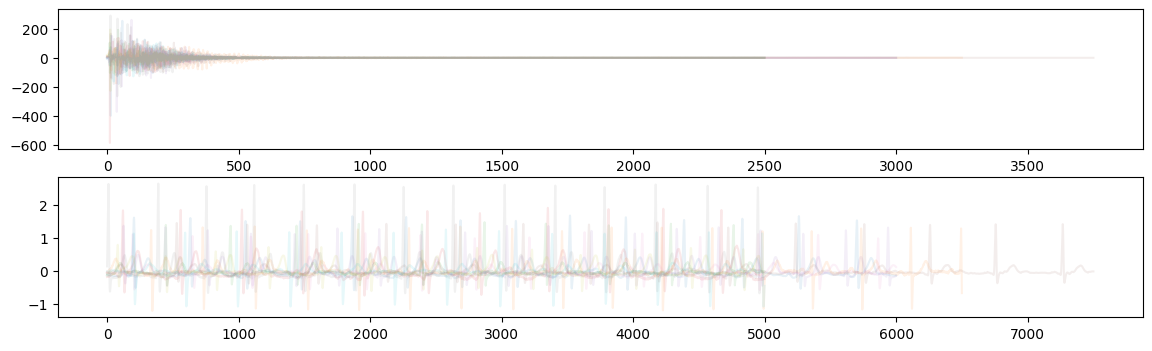

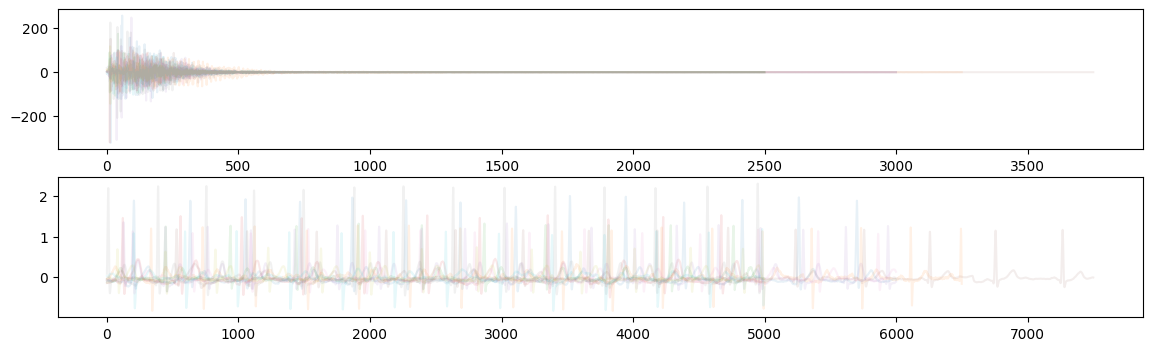

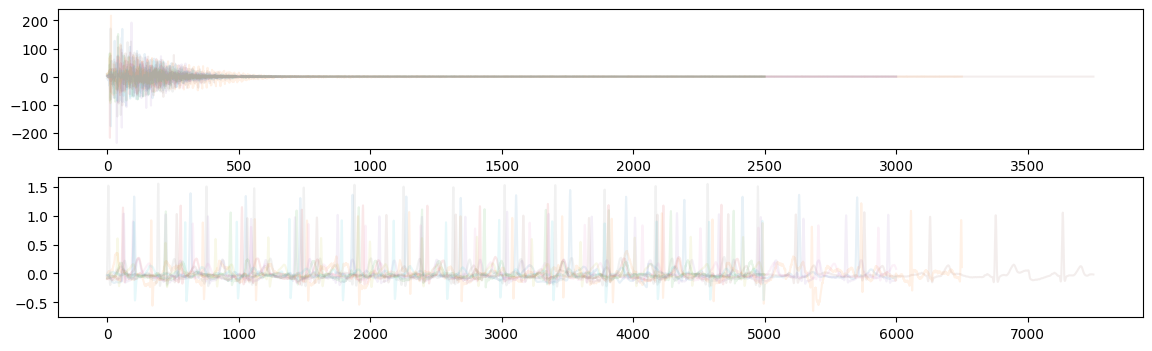

In [10]:
def freq_amplitude_dots(_signal):
    plt.rcParams['figure.figsize'] = [12, 6]

    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 7]})
    fig.tight_layout()

    signal = _signal[0]

    ax[1].plot(signal)

    ax[0].scatter([0 for i in range(len(signal))], signal, alpha=0.05)
    plt.show()

def freq_amplitude(_signal):
    plt.rcParams['figure.figsize'] = [12, 6]

    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]})
    fig.tight_layout()

    signal = _signal[0]

    ax[0].hist(signal, bins=100, edgecolor='black', alpha=0.7, orientation = 'horizontal')

    ax[1].plot(signal)

    plt.show()

def ffter(signals_, line_num=0):
    for signal in signals_:
        res = fft(signal[line_num])

        plt.subplot(211)
        plt.plot(res[0:len(res)//2], alpha=0.1)

        plt.subplot(212)
        plt.plot(ifft(res), alpha=0.1)
    
    plt.show()

# freq_amplitude_dots(signals[0])

# freq_amplitude(signals[0])

for i in range(0, 12):
    ffter(signals, i)

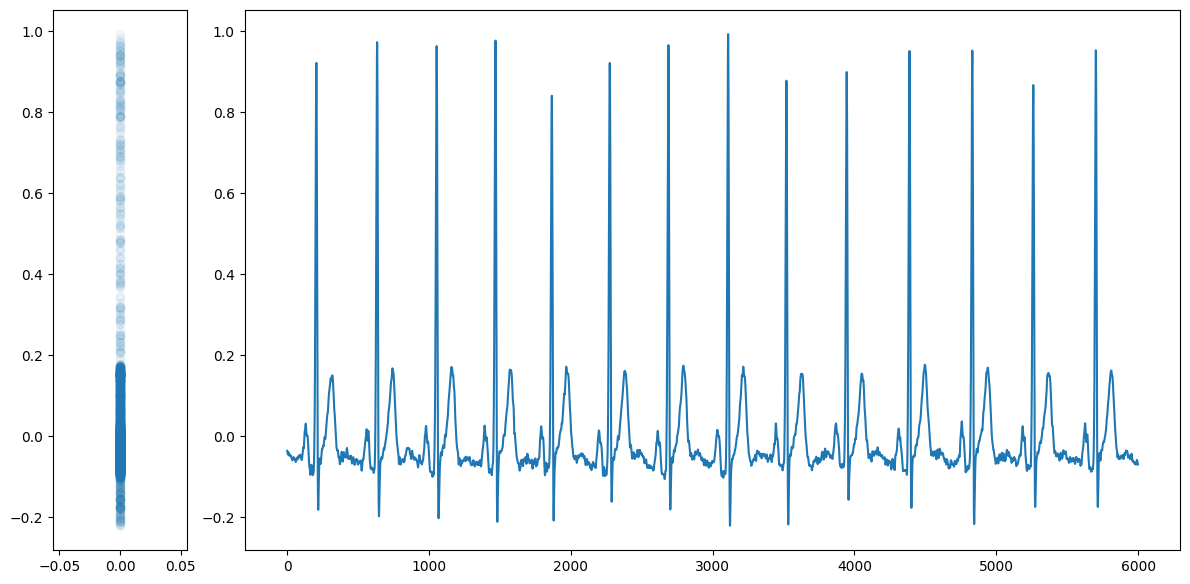

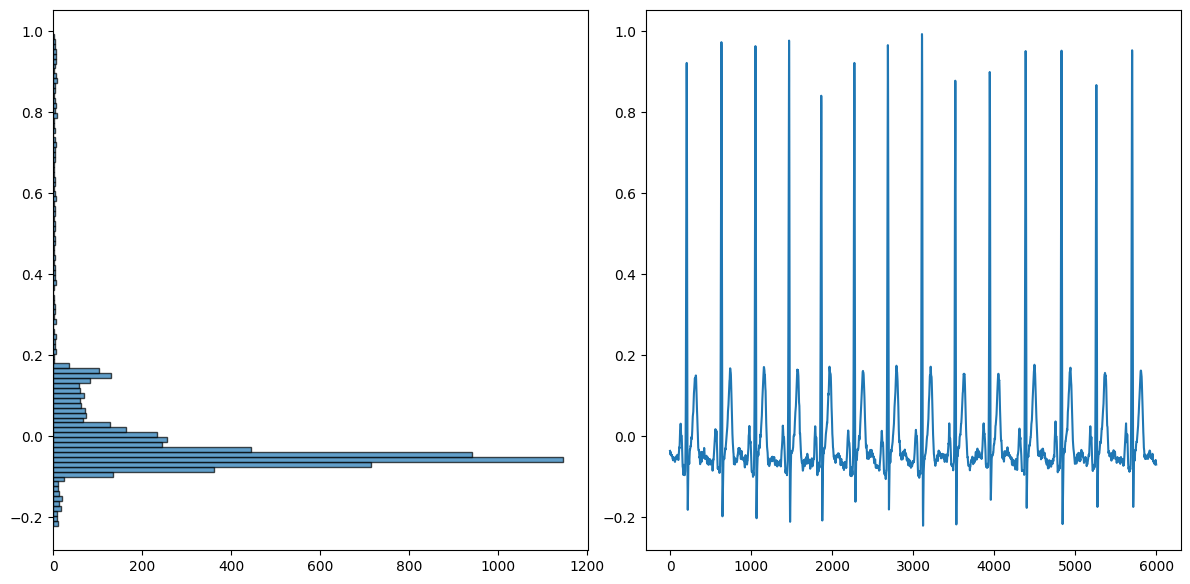

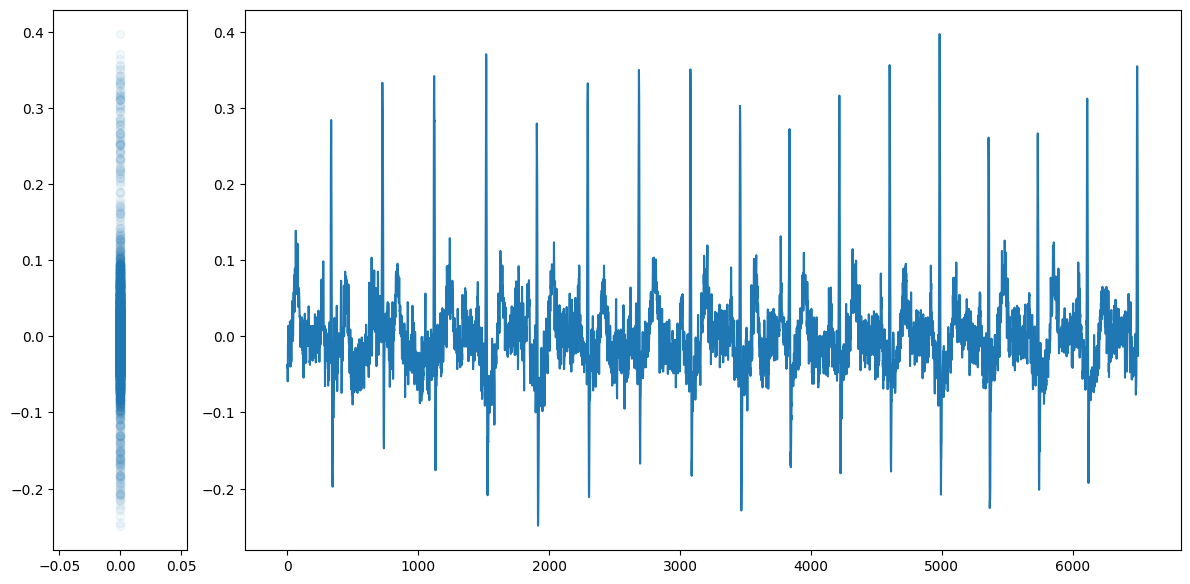

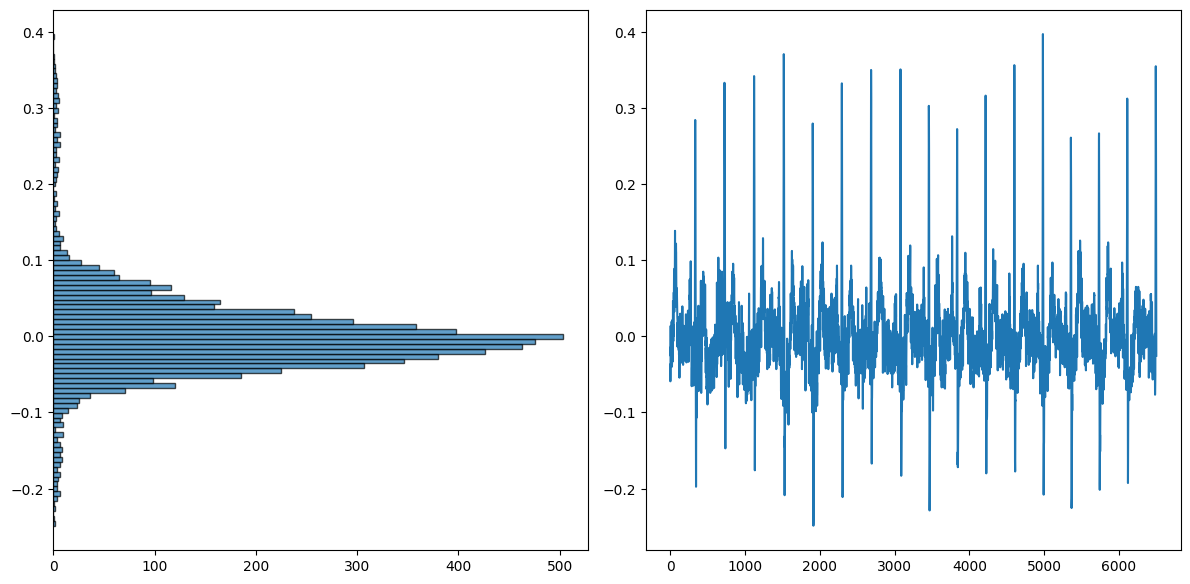

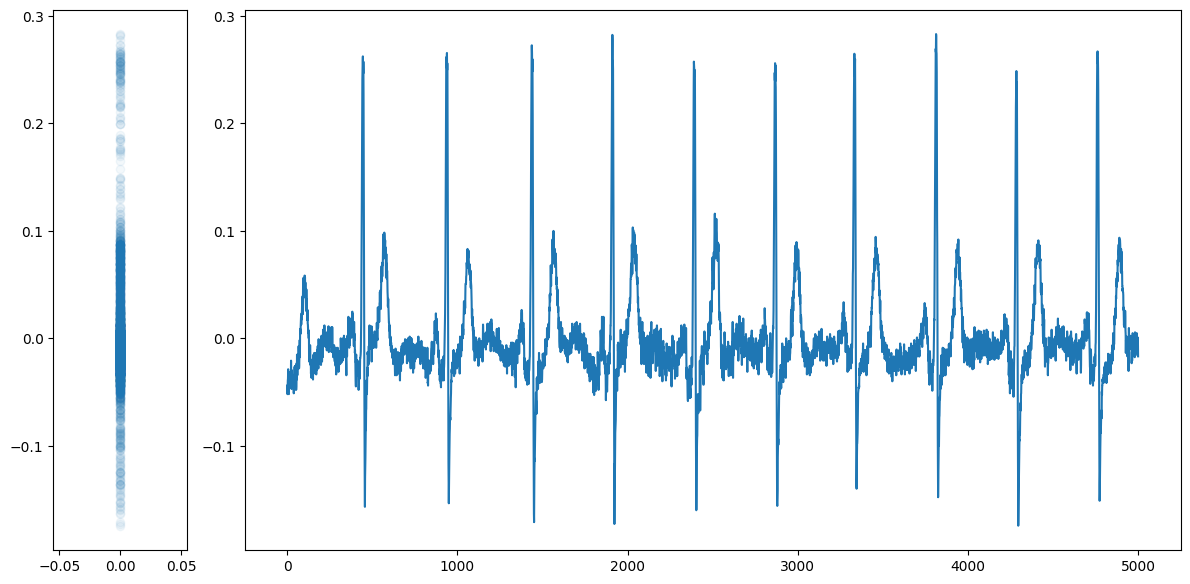

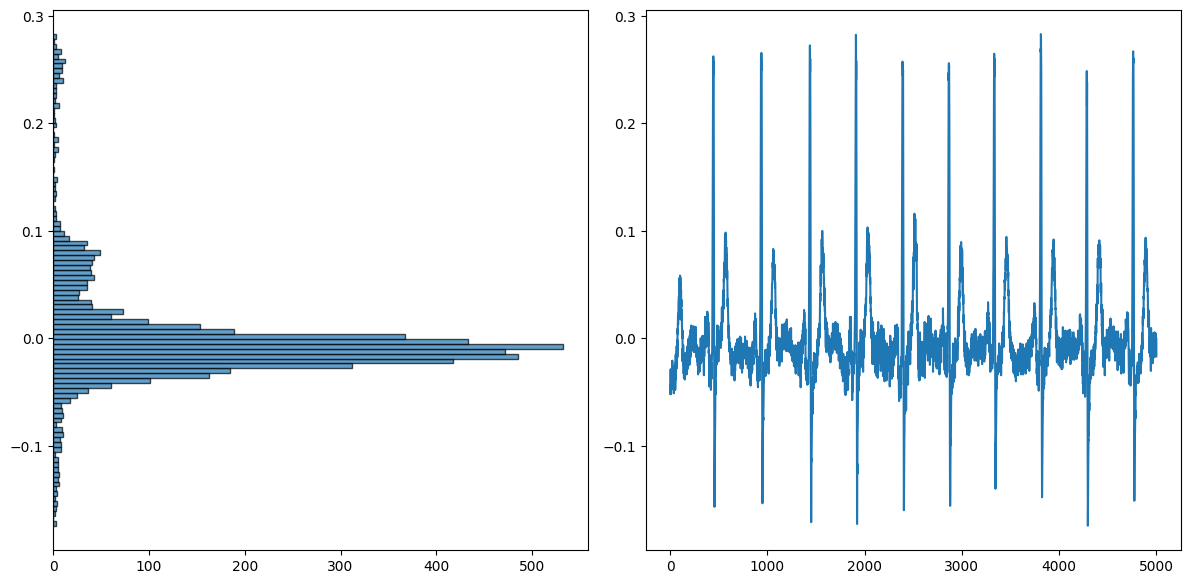

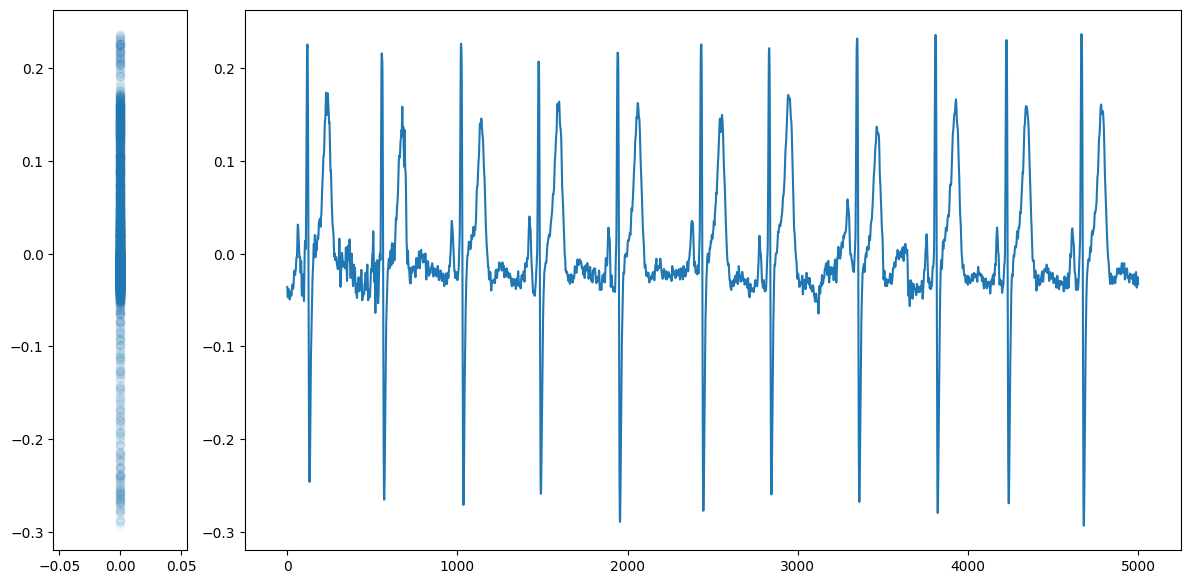

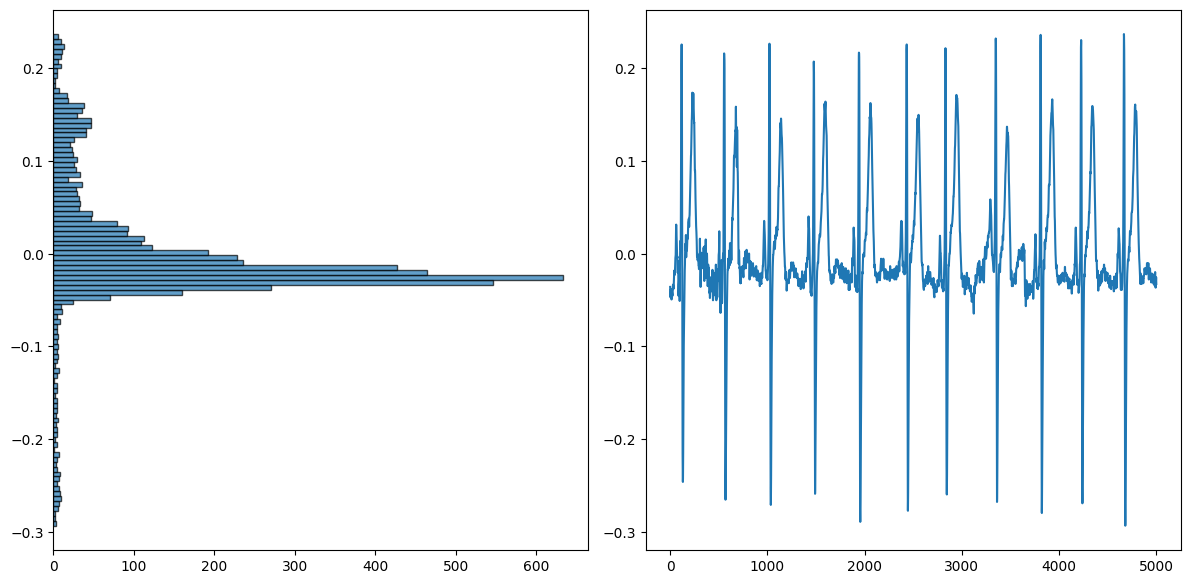

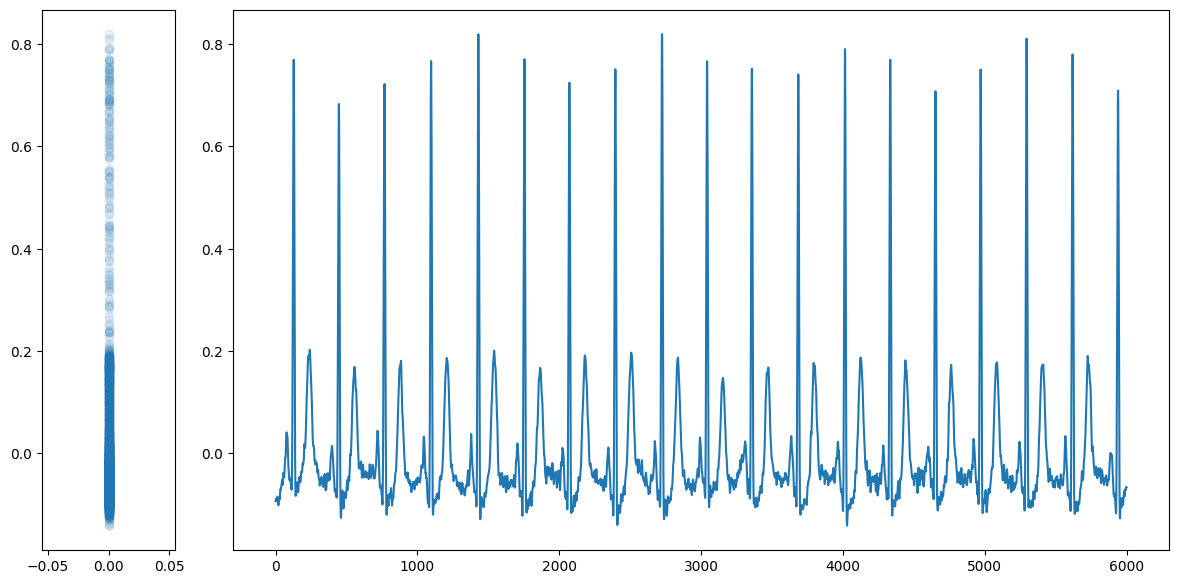

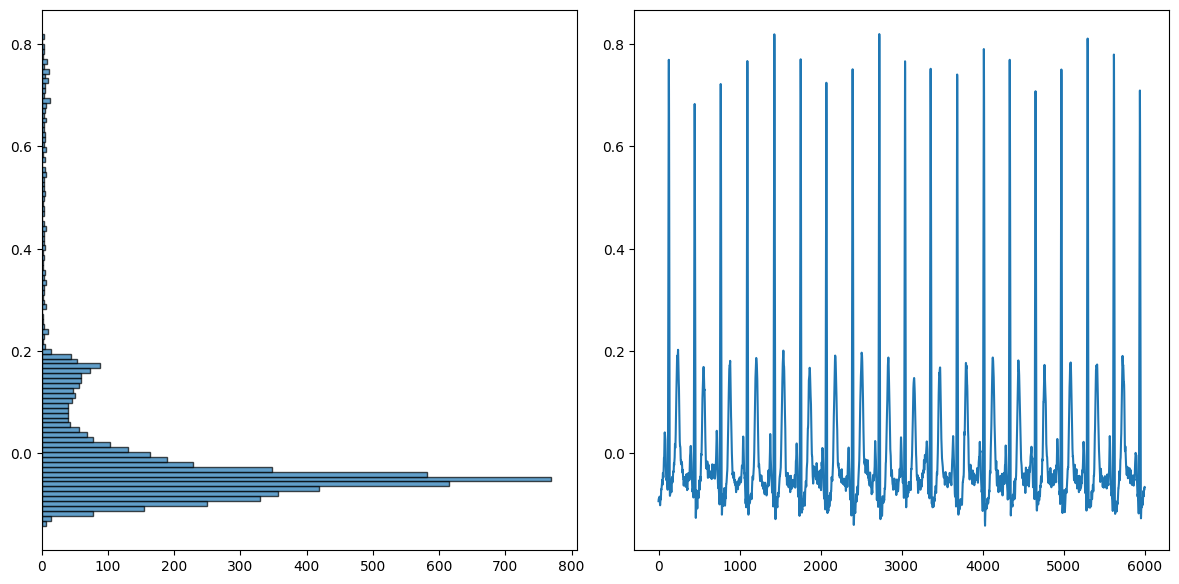

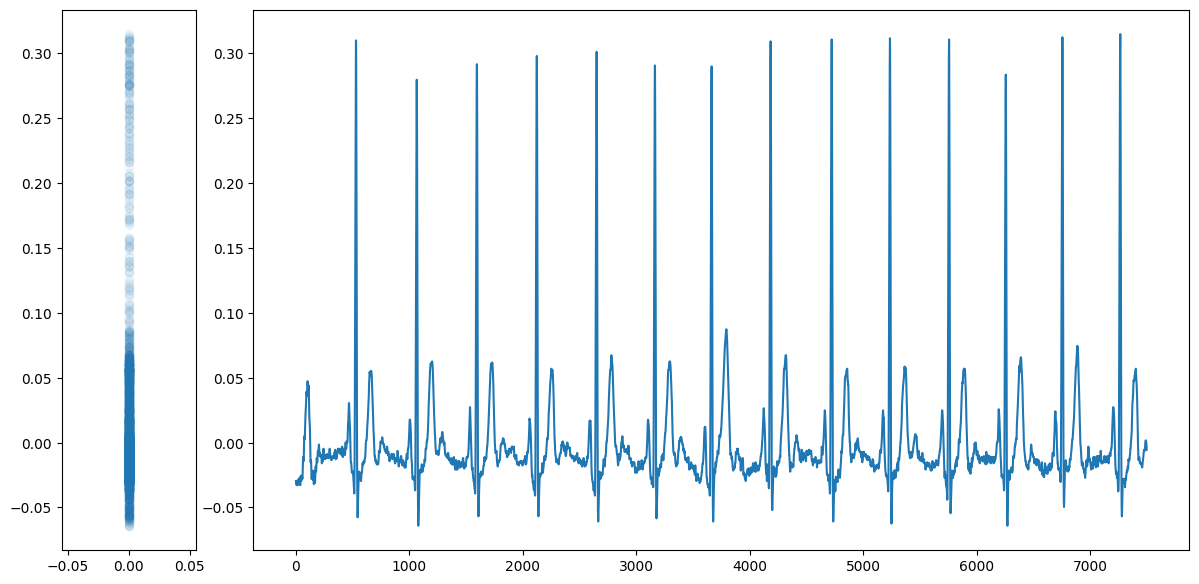

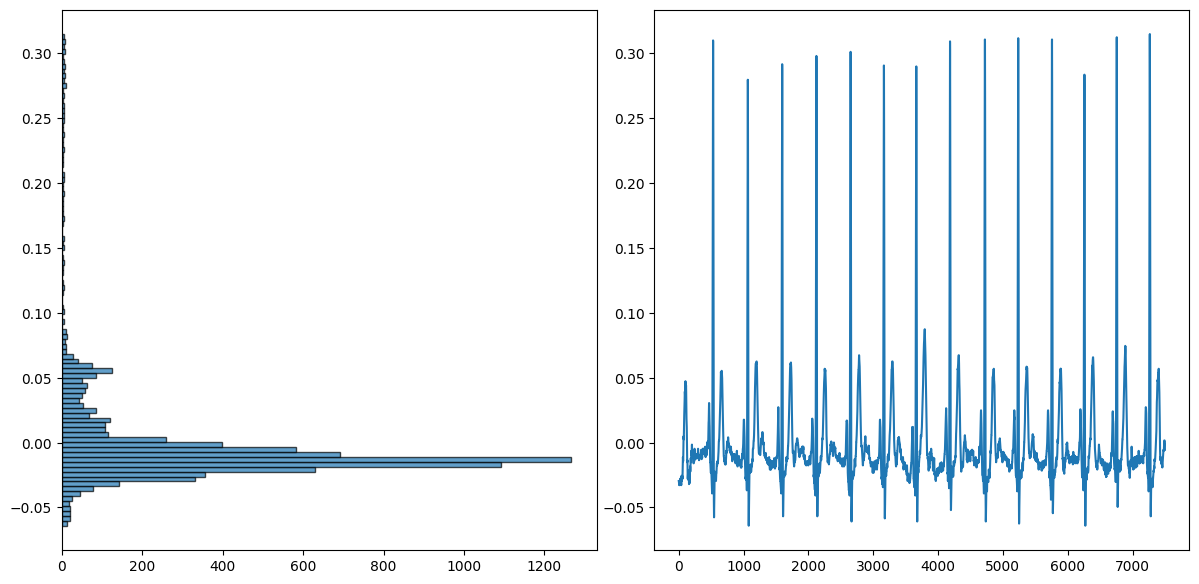

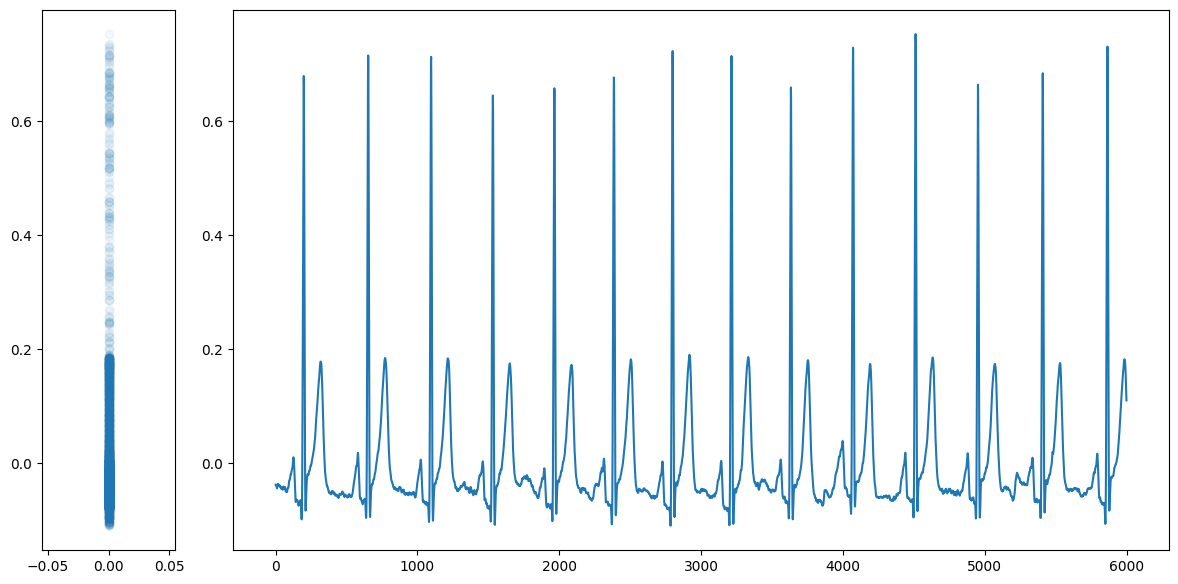

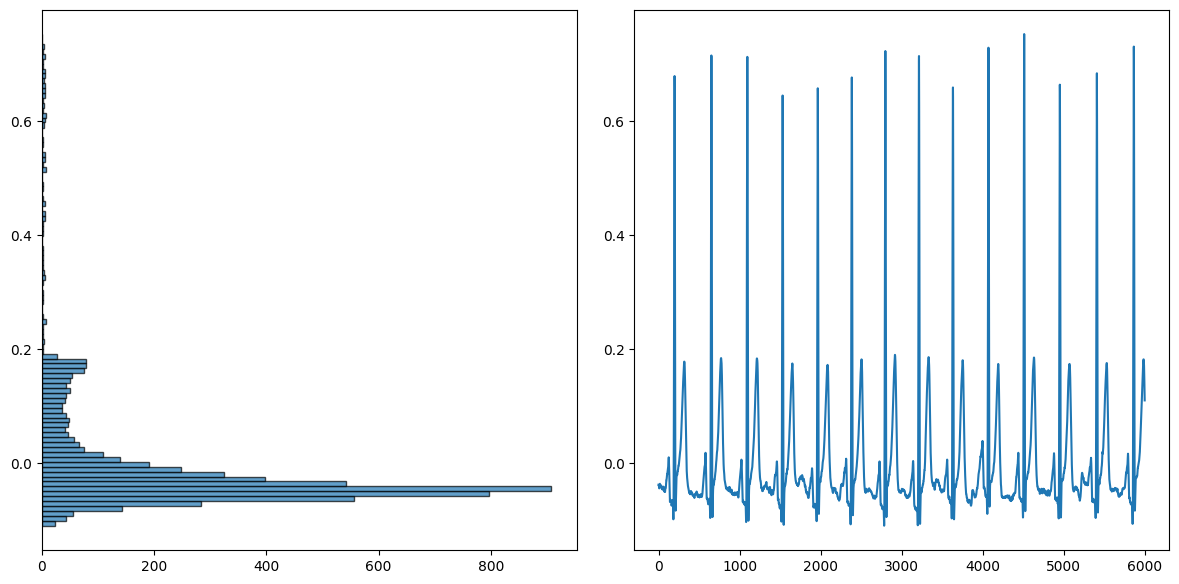

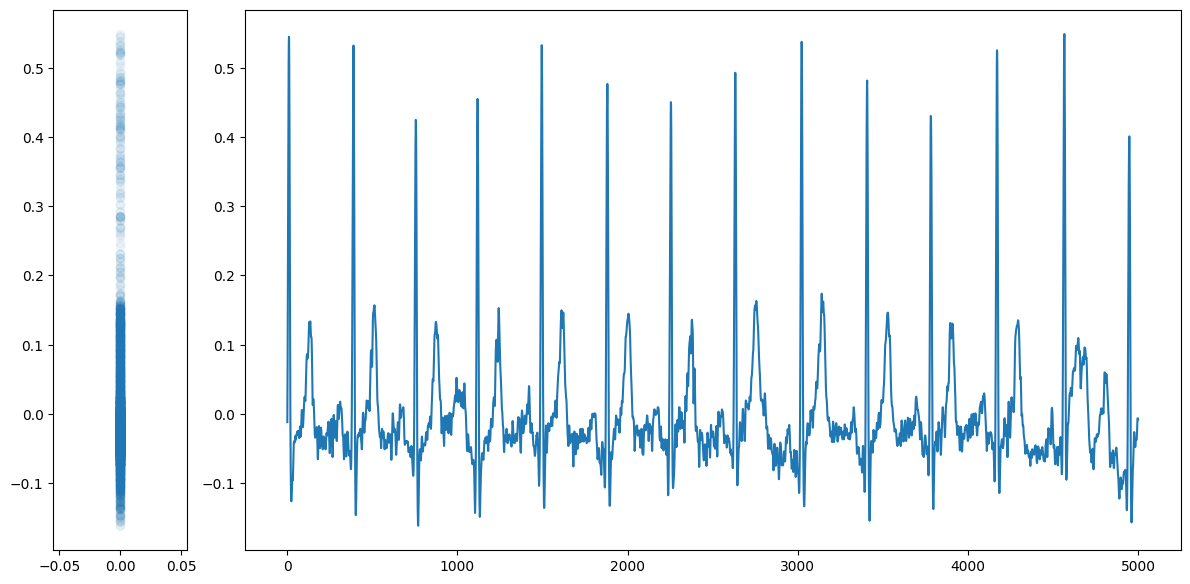

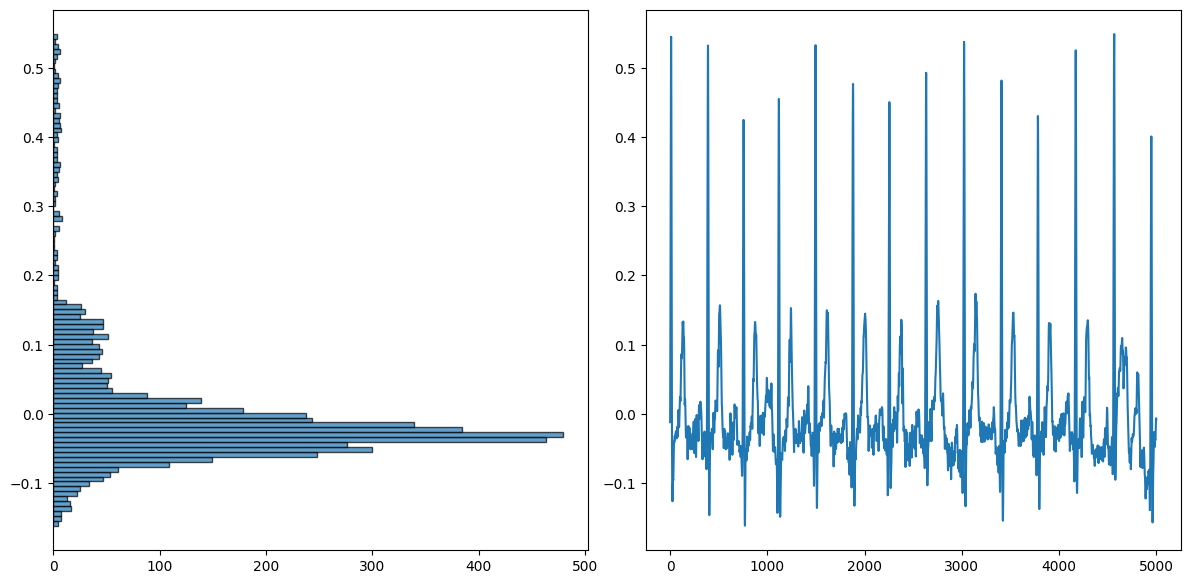

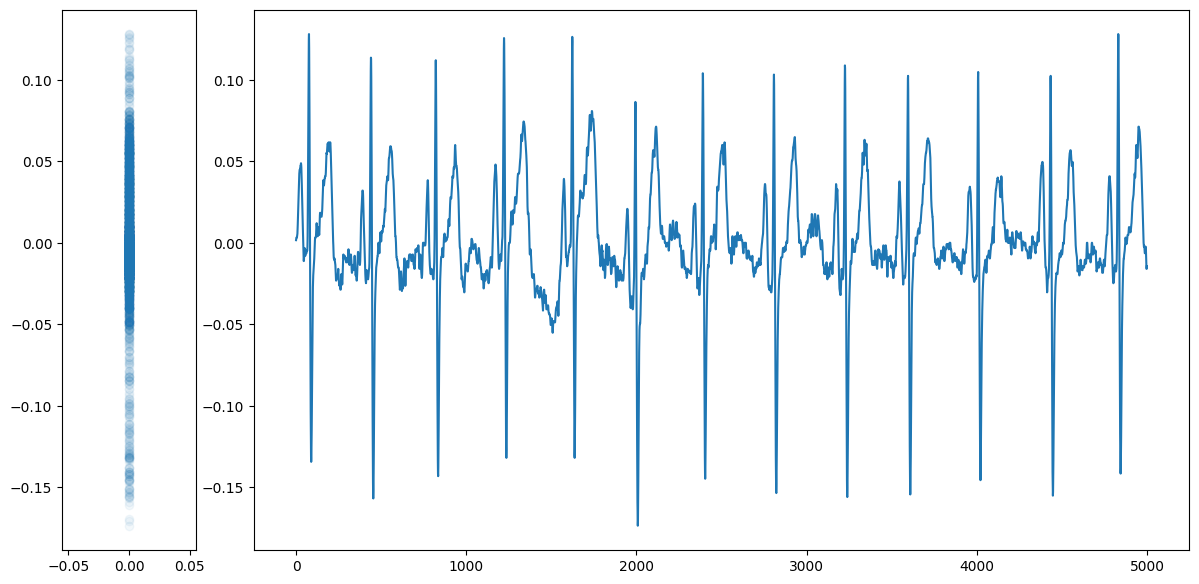

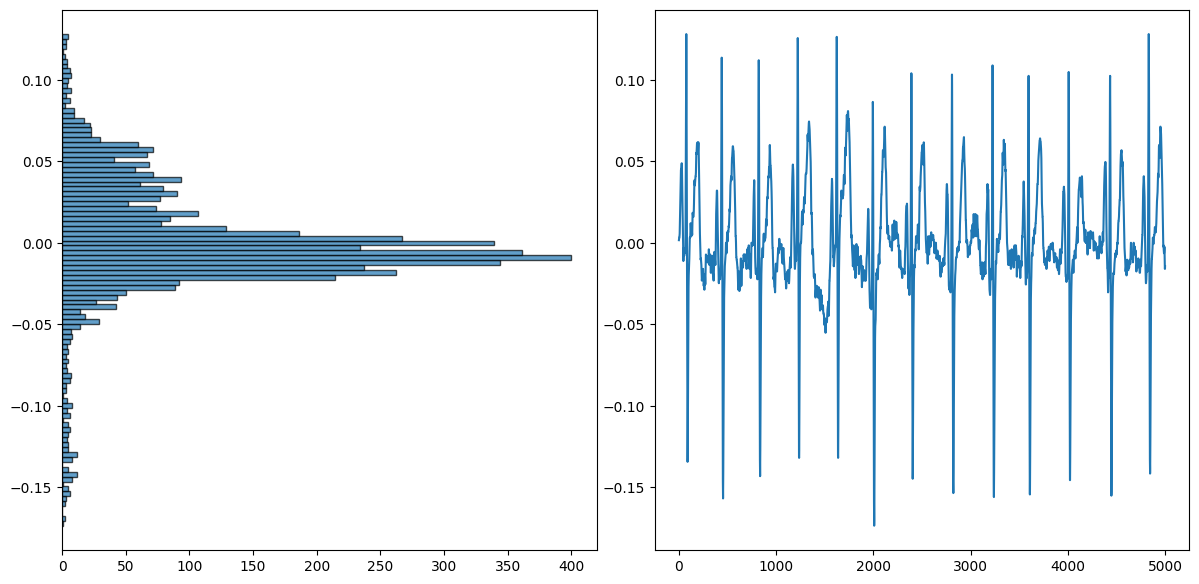

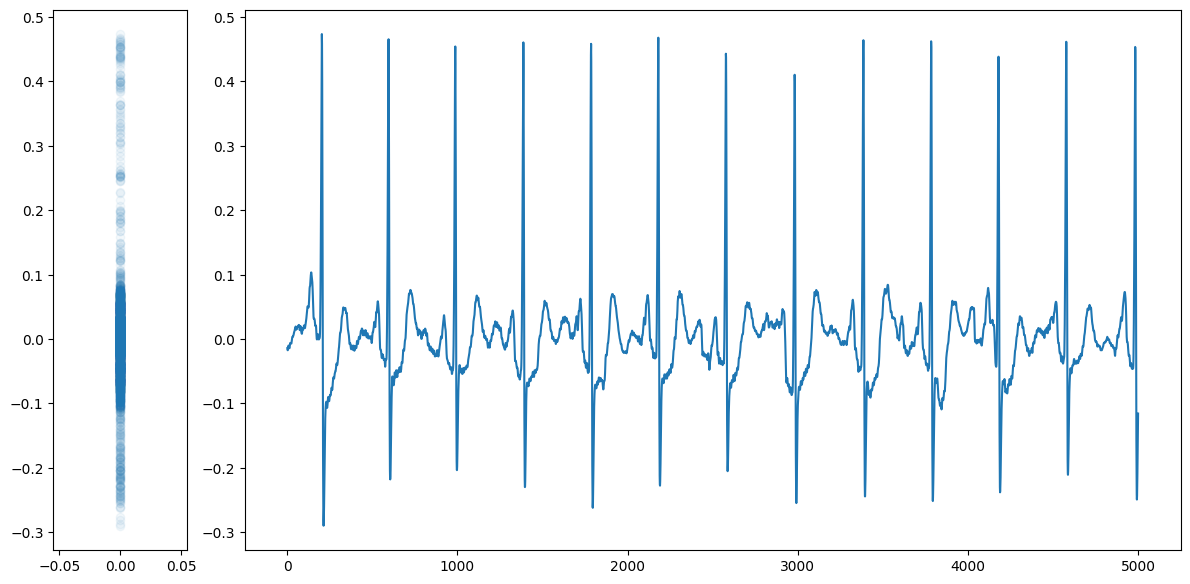

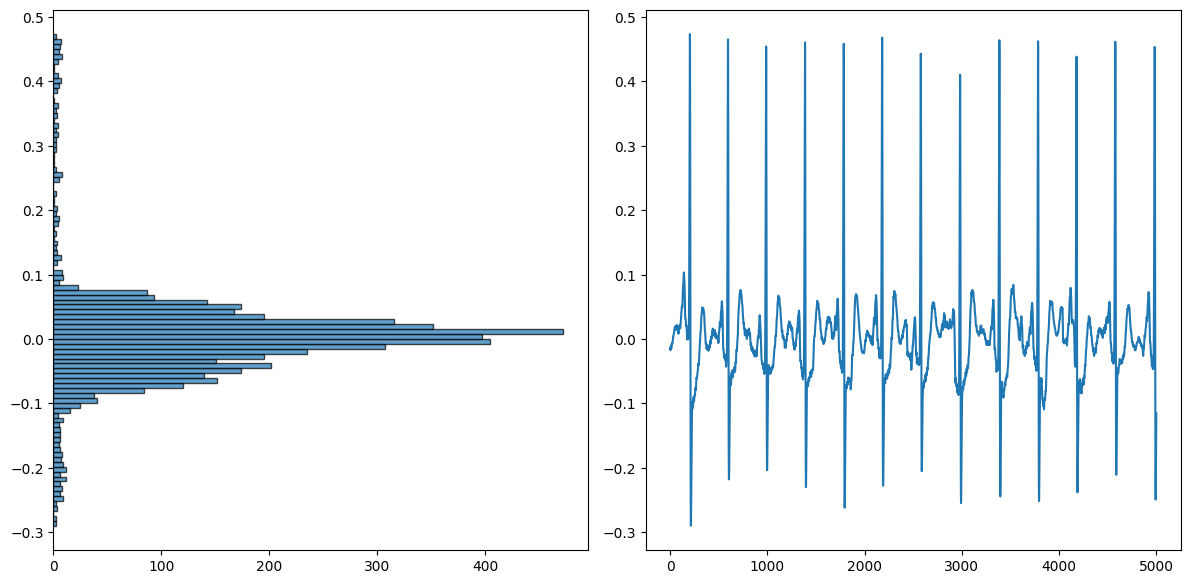

In [11]:
for signal in signals:
    freq_amplitude_dots(signal)

    freq_amplitude(signal)

In [13]:
N = 100

signals_N = []

for i in health_ECG_ID[0:N]:
    with h5py.File(f'../records/record1/{i}.h5', 'r') as f:
        signals_N.append(f['ecg'][()])

In [14]:
signals_0 = torch.tensor([signal[0][0:5000] for signal in signals_N], dtype=torch.float32)
labels_0 = torch.tensor([0 for i in range(len(signals_0))], dtype=torch.float32).reshape((len(signals_0), 1))

C:\Users\Админ\AppData\Local\Temp\ipykernel_36464\1877273294.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  signals_0 = torch.tensor([signal[0][0:5000] for signal in signals_N], dtype=torch.float32)


Epoch [5/10], Loss: 0.0025
Epoch [10/10], Loss: 0.0002
Test Accuracy: 1.0000


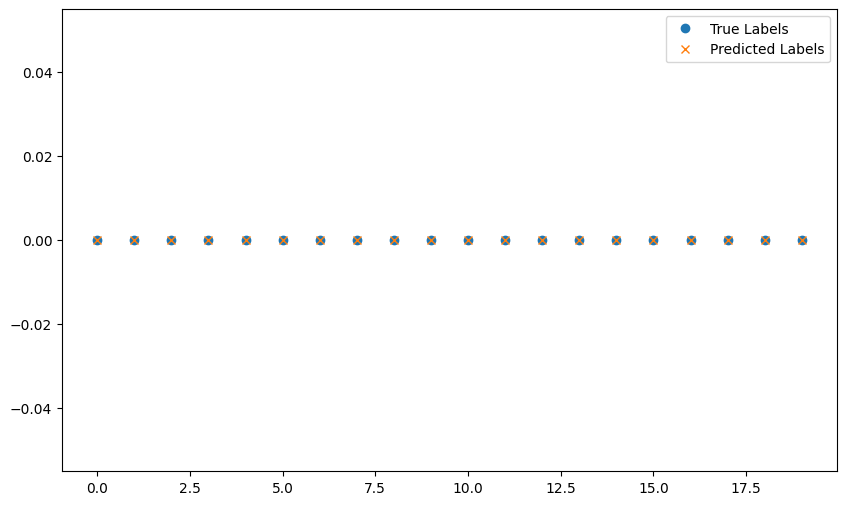

In [15]:
# 1. Подготовка данных

data_size = 1000
n_steps = 50
data = signals_0
labels = labels_0

# Разделение данных на вход (X) и метки (y)
X = data.unsqueeze(-1)  # (batch_size, seq_len, input_size)
y = labels

# Создание TensorDataset
dataset = TensorDataset(X, y)

# Разделение на обучающую и тестовую выборки
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Создание DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 2. Создание модели LSTM для бинарной классификации
class LSTMBinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMBinaryClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Берем только последний выход LSTM
        out = self.sigmoid(out)  # Применяем сигмоиду для получения вероятности
        return out

# Параметры модели
input_size = 1  # Один признак на каждый временной шаг
hidden_size = 50
output_size = 1  # Один выход для бинарной классификации
num_layers = 1

model = LSTMBinaryClassifier(input_size, hidden_size, output_size, num_layers)

# 3. Определение функции потерь и оптимизатора
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 4. Обучение модели
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass и оптимизация
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 5. Оценка модели
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        predicted = (outputs > 0.5).float()
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(batch_y.tolist(), label='True Labels', marker='o', linestyle='None')
plt.plot(predicted.tolist(), label='Predicted Labels', marker='x', linestyle='None')
plt.legend()
plt.show()